Инициализация 

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split
import torch.nn.functional as F
from torchmetrics import R2Score
import torch.optim as optim
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import *

Загрузим датасет

In [3]:
url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

In [4]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view', params='', query='', fragment='')

In [5]:
url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
concrete = pd.read_csv(url)

In [6]:
print(concrete.shape)
concrete.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
concrete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [122]:
concrete.isna().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [123]:
concrete.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
concrete.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

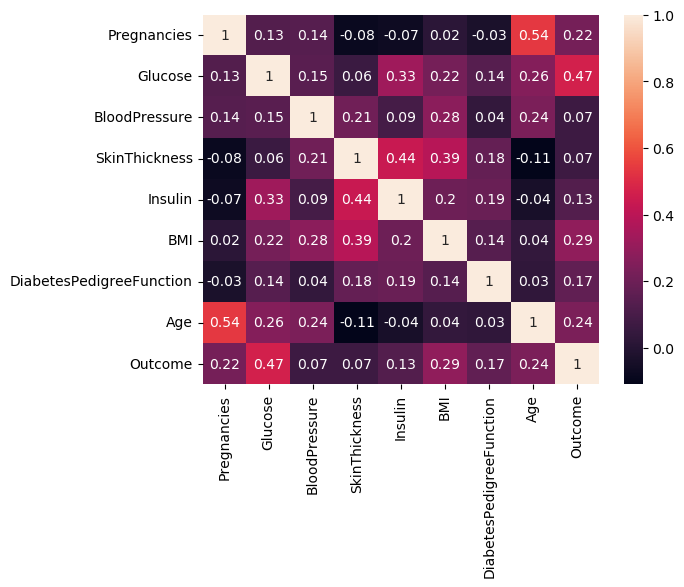

In [125]:
correlation_matrix = concrete.corr(numeric_only = False).round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [126]:
concrete.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [127]:
looking_for = 'Outcome'

In [128]:
X = concrete.drop(labels=[looking_for], axis=1)
y = concrete[looking_for]

In [129]:
sscaler = preprocessing.StandardScaler()
sscaler.fit(X)
X_std= sscaler.transform(X)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size=0.3, random_state=42)
X_train.shape

(537, 8)

In [131]:
class Ourmodel(nn.Module):
    def __init__(self, n_f, hid, out):
        super().__init__()
        self.l1 = nn.Linear(n_f, hid)
        self.l2= nn.Linear(hid, hid*2)
        self.l3 = nn.Linear(hid*2, out)
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        out1 = self.relu(self.l1(inputs))
        out2 = self.relu(self.l2(out1))
        out3 = self.l3(out2)
        return out3

In [132]:
our = Ourmodel(X_train.shape[1], 537,1)
sum(p.shape[0]*p.shape[1] if len(p.shape)==2 else p.shape[0] for p in our.parameters())

583720

In [133]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.8449, -0.8104, -0.4707,  ..., -1.0271, -0.6399, -0.9565],
        [ 0.3430, -0.4975,  0.1496,  ...,  0.6228, -0.9449, -0.4459],
        [-1.1419,  0.4415, -0.0572,  ...,  1.3082, -0.3228, -0.7863],
        ...,
        [ 1.8278, -0.6226,  0.8734,  ...,  1.7270,  2.0057,  0.4049],
        [-1.1419,  0.6292, -3.5726,  ...,  1.3209, -0.8060, -0.3608],
        [-1.1419,  0.1285,  1.3904,  ..., -1.2048, -0.6339, -1.0415]],
       requires_grad=True)

In [134]:
loss_fn=nn.MSELoss()
optimizer= torch.optim.SGD(our.parameters(), lr=0.01)

In [135]:
epochs=1500 
losses=[]
iters=[]
for i in range(epochs):
  running_loss = 0.0
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=our(x)
  loss=loss_fn(output,y)
  losses.append(running_loss+loss.item())
  iters.append(i)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
        iters.append(i)
        losses.append(loss)
        
  if(i%50==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:0.387281596660614
epochs: 50......loss:0.15156638622283936
epochs: 100......loss:0.14295125007629395
epochs: 150......loss:0.13790997862815857
epochs: 200......loss:0.1340593844652176
epochs: 250......loss:0.13089440762996674
epochs: 300......loss:0.12819978594779968
epochs: 350......loss:0.12582868337631226
epochs: 400......loss:0.12368210405111313
epochs: 450......loss:0.12169861793518066
epochs: 500......loss:0.11984133720397949
epochs: 550......loss:0.11807417124509811
epochs: 600......loss:0.1163942962884903
epochs: 650......loss:0.11478753387928009
epochs: 700......loss:0.11323730647563934
epochs: 750......loss:0.11172585934400558
epochs: 800......loss:0.11024697870016098
epochs: 850......loss:0.10879535973072052
epochs: 900......loss:0.10736744850873947
epochs: 950......loss:0.10596922039985657
epochs: 1000......loss:0.10459300130605698
epochs: 1050......loss:0.10324452072381973
epochs: 1100......loss:0.10191736370325089
epochs: 1150......loss:0.1006029769778

In [137]:
y_train_pred = our(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = our(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [138]:
from sklearn.metrics import r2_score

test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.5962562409321721
0.18397184499594232


No handles with labels found to put in legend.


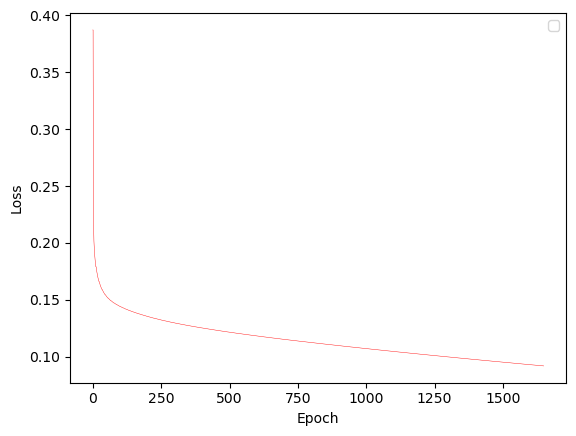

In [139]:
plt.plot(np.arange(len(iters)),list(map(float, losses)), 'r', linewidth=0.3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

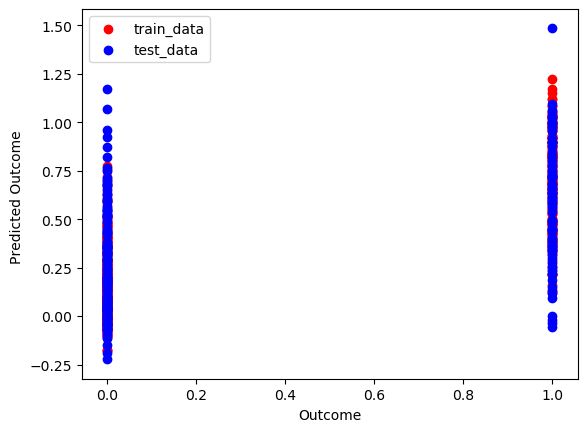

In [140]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


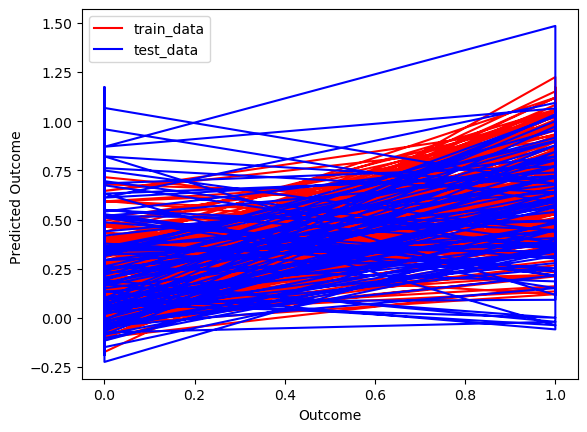

In [141]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.plot(y_train,y_train_pred,color='r',label="train_data")
plt.plot(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

In [168]:
class Ourmodel(nn.Module):
    def __init__(self, n_f, hid, out):
        super().__init__()
        self.l1 = nn.Linear(n_f, hid)
        self.l2= nn.Linear(hid, hid*2)
        self.l3 = nn.Linear(hid*2, hid*3)
        self.l4 = nn.Linear(hid*3, out)
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        out1 = self.relu(self.l1(inputs))
        out2 = self.relu(self.l2(out1))
        out3 = self.relu(self.l3(out2))
        out4 = self.l4(out3)
        return out4

In [169]:
our = Ourmodel(X_train.shape[1], 60,1)
sum(p.shape[0]*p.shape[1] if len(p.shape)==2 else p.shape[0] for p in our.parameters())

29821

In [170]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.8449, -0.8104, -0.4707,  ..., -1.0271, -0.6399, -0.9565],
        [ 0.3430, -0.4975,  0.1496,  ...,  0.6228, -0.9449, -0.4459],
        [-1.1419,  0.4415, -0.0572,  ...,  1.3082, -0.3228, -0.7863],
        ...,
        [ 1.8278, -0.6226,  0.8734,  ...,  1.7270,  2.0057,  0.4049],
        [-1.1419,  0.6292, -3.5726,  ...,  1.3209, -0.8060, -0.3608],
        [-1.1419,  0.1285,  1.3904,  ..., -1.2048, -0.6339, -1.0415]],
       requires_grad=True)

In [171]:
loss_fn=nn.MSELoss()
optimizer= torch.optim.SGD(our.parameters(), lr=0.01)

In [172]:
epochs=1500 
losses=[]
iters=[]
for i in range(epochs):
  running_loss = 0.0
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=our(x)
  loss=loss_fn(output,y)
  losses.append(running_loss+loss.item())
  iters.append(i)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
        iters.append(i)
        losses.append(loss)
        
  if(i%50==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:0.325339674949646
epochs: 50......loss:0.20359957218170166
epochs: 100......loss:0.18843771517276764
epochs: 150......loss:0.17653630673885345
epochs: 200......loss:0.1676405519247055
epochs: 250......loss:0.1613318920135498
epochs: 300......loss:0.15691885352134705
epochs: 350......loss:0.15369315445423126
epochs: 400......loss:0.15119586884975433
epochs: 450......loss:0.14914429187774658
epochs: 500......loss:0.14740586280822754
epochs: 550......loss:0.14589956402778625
epochs: 600......loss:0.14456623792648315
epochs: 650......loss:0.14338266849517822
epochs: 700......loss:0.14231479167938232
epochs: 750......loss:0.14132696390151978
epochs: 800......loss:0.14041347801685333
epochs: 850......loss:0.139557346701622
epochs: 900......loss:0.13875384628772736
epochs: 950......loss:0.13800165057182312
epochs: 1000......loss:0.13727805018424988
epochs: 1050......loss:0.13657745718955994
epochs: 1100......loss:0.13589993119239807
epochs: 1150......loss:0.135240867733955

In [173]:
y_train_pred = our(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = our(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [174]:
from sklearn.metrics import r2_score

test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.42401685111106546
0.21497070315162403


No handles with labels found to put in legend.


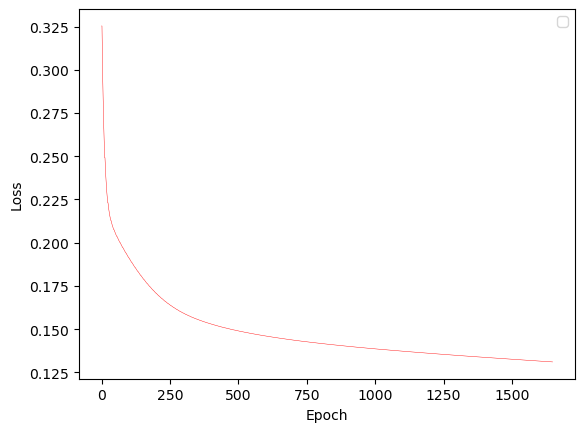

In [175]:
plt.plot(np.arange(len(iters)),list(map(float, losses)), 'r', linewidth=0.3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


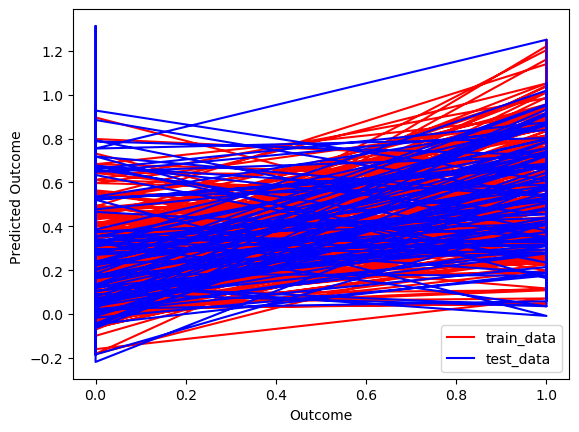

In [176]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.plot(y_train,y_train_pred,color='r',label="train_data")
plt.plot(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()